In [ ]:
# importing packages (dependencies)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:
# step 1 :- loading the data and cleaning the dataset
df = pd.read_csv('car_dataset.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
154,Yamaha Fazer,2014,0.50,0.88,8000,Petrol,Individual,Manual,0
236,eon,2016,3.10,4.43,11849,Petrol,Dealer,Manual,0
162,Bajaj Pulsar NS 200,2012,0.45,0.99,14500,Petrol,Individual,Manual,0
248,i10,2013,4.00,4.60,30000,Petrol,Dealer,Manual,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
33,ertiga,2014,6.00,9.95,45000,Diesel,Dealer,Manual,0
261,brio,2016,5.50,5.97,5600,Petrol,Dealer,Manual,0
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
78,corolla altis,2010,5.25,22.83,80000,Petrol,Dealer,Automatic,0
285,jazz,2016,7.40,8.50,15059,Petrol,Dealer,Automatic,0


In [ ]:
df.shape

(301, 9)

In [ ]:
# getting insight of datasets
df.info()
# object mean string we can say

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df.Transmission.value_counts( )

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
df.Seller_Type.value_counts( )

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
# Encoding the categories data (objects to integer)
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [ ]:
# step 2:-
# splitting the data in to variable X & Y
X = df.drop(['Car_Name','Selling_Price'],axis = 1)
print(X)
Y=df['Selling_Price']
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
#splitting the data for training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(270, 7)
(31, 7)
(270,)


In [ ]:
#model training
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
pred_score =  lin_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train,pred_score)
print(error_score)

0.8849815853900536


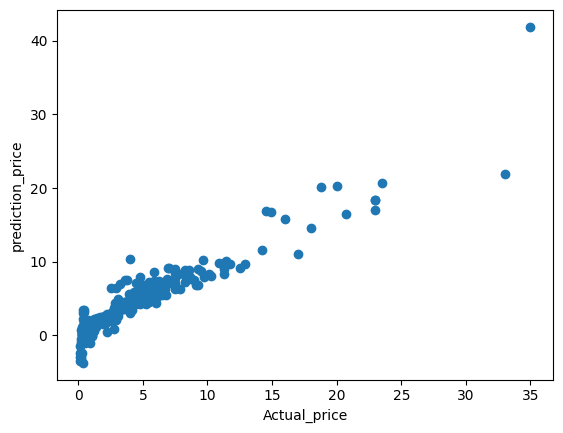

In [ ]:
plt.scatter(Y_train,pred_score)
plt.xlabel('Actual_price')
plt.ylabel('prediction_price')
plt.show()

In [ ]:
# testing the model with testing data
pred_score =  lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test,pred_score)
print(error_score)

0.7979072218427206


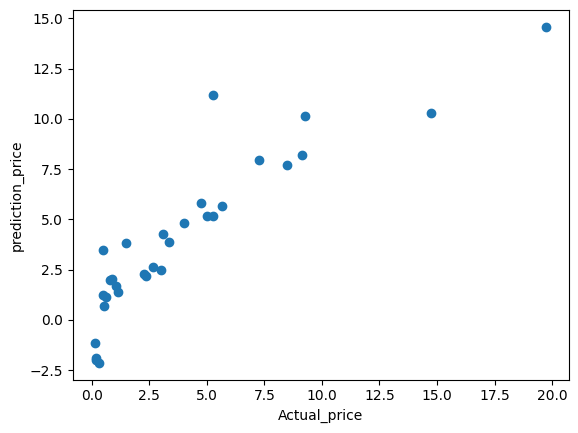

In [ ]:
plt.scatter(Y_test,pred_score)
plt.xlabel('Actual_price')
plt.ylabel('prediction_price')
plt.show()